# Advanced Pairs Trading : Kalman Filters

## Import library

In [21]:
import sys
sys.path.append('../../')

In [22]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

## Getting the Data

In [23]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [24]:
Currency_Pair = 'AUDUSD'

## TF D1

In [25]:
TF = 'D1'

In [26]:
data_1 = XAUUSD[TF]

In [27]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

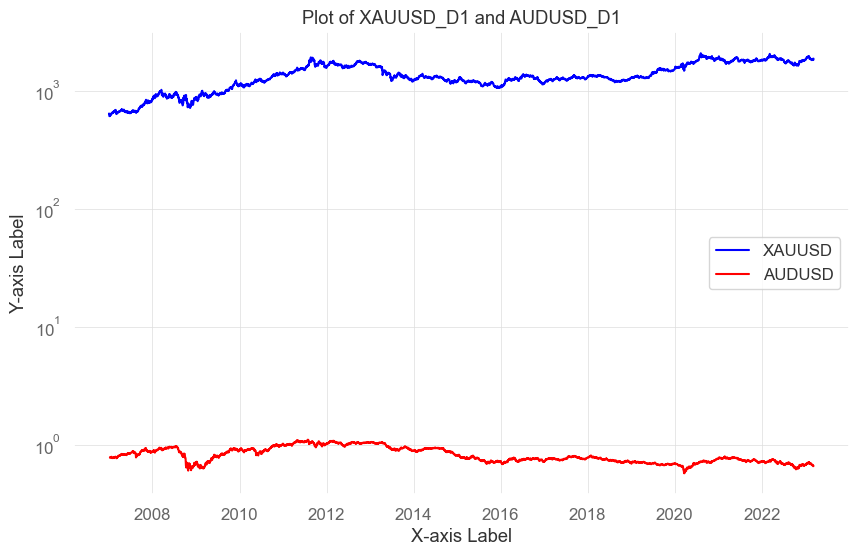

In [28]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [29]:
KF = Kalman_Filter(data_1, data_2)

In [30]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          5.923e+04
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:33:32   Log-Likelihood:                         -37301.
No. Observations:                5054   AIC:                                  7.460e+04
Df Residuals:                    5053   BIC:                                  7.461e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1598.4162      6.568    243.377      0.000    1585.541    1611.292
==============================================================================
Omnibus:                      189.083   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.164
Skew:                           0.329   Prob(JB):                     1.82e-32
Kurtosis:                       2.488   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
result = KF.Run()

In [32]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         3e-06
Multiple (Buy-and-Hold):     3.891027
--------------------------------------
Out-/Underperformance:       -3.891024


CAGR:                        -0.545925
Annualized Mean:             -0.789492
Annualized Std:              0.43334
Sharpe Ratio:                -1.821876
Sortino Ratio:               -1.884733
Maximum Drawdown:            0.999998
Calmar Ratio:                -0.545926
Max Drawdown Duration:       5706 Days
Kelly Criterion:             -4.410755


### Save Result Backtest 

In [33]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [34]:
filename = f'{Currency_Pair}_{TF}.csv'

In [35]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-09
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -100.0%
CAGR﹪                     -46.16%

Sharpe                     -1.64
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.29
Sortino                    -1.69
Smart Sortino              -1.34
Sortino/√2                 -1.2
Smart Sortino/√2           -0.94
Omega                      0.56

Max Drawdown               -100.0%
Longest DD Days            5715
Volatility (ann.)          38.9%
Calmar                     -0.46
Skew                       -6.92
Kurtosis                   55.79

Expected Daily %           -0.29%
Expected Monthly %         -7.17%
Expected Yearly %          -57.4%
Kelly Criterion            -38.74%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.28%
Expected Shortfall (cVaR)  -4.28%

Max Consecuti

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-18,2023-03-10,5715,-99.999966,-99.999962
2,2007-01-12,2007-02-26,2007-06-07,147,-9.582775,-9.265113
3,2007-07-06,2007-07-10,2007-07-16,11,-1.900123,-1.520018
4,2007-06-10,2007-06-19,2007-06-25,16,-1.518311,-1.418197
5,2007-06-27,2007-06-29,2007-07-04,8,-0.769150,-0.559250


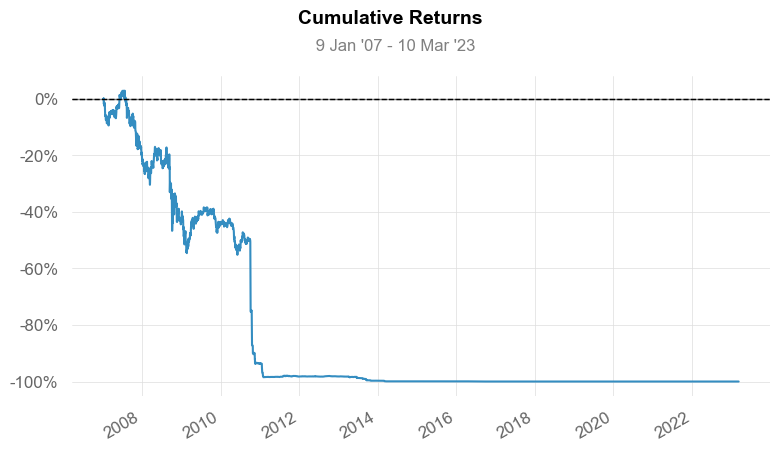

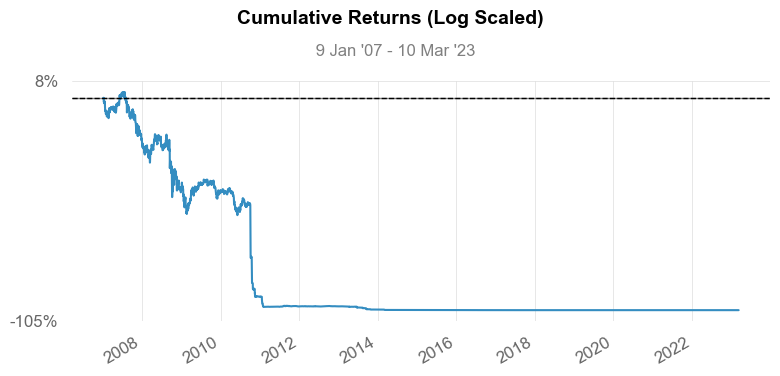

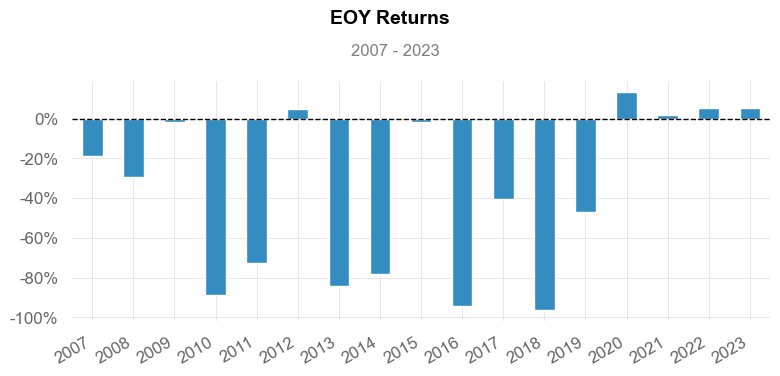

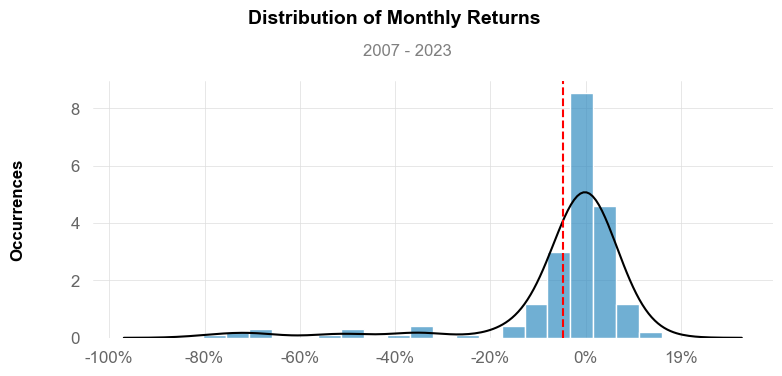

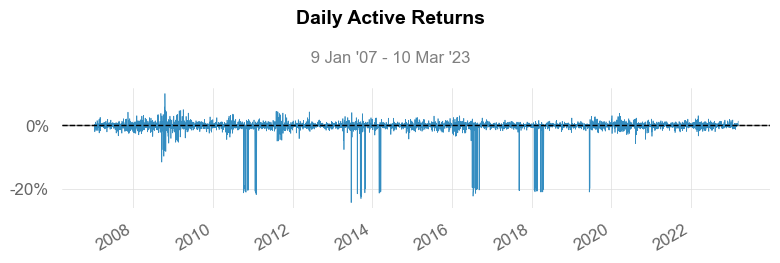

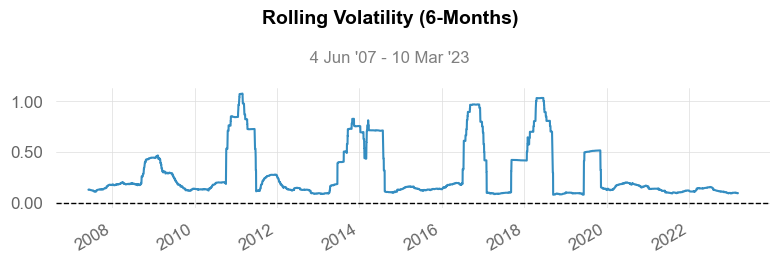

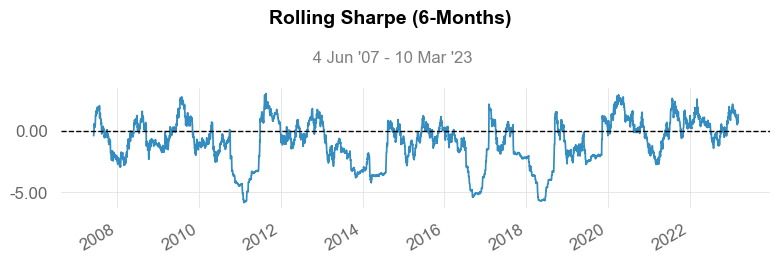

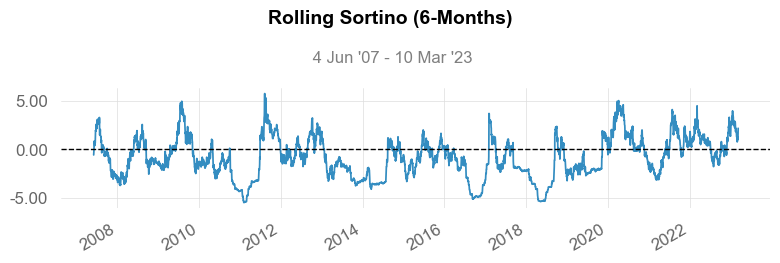

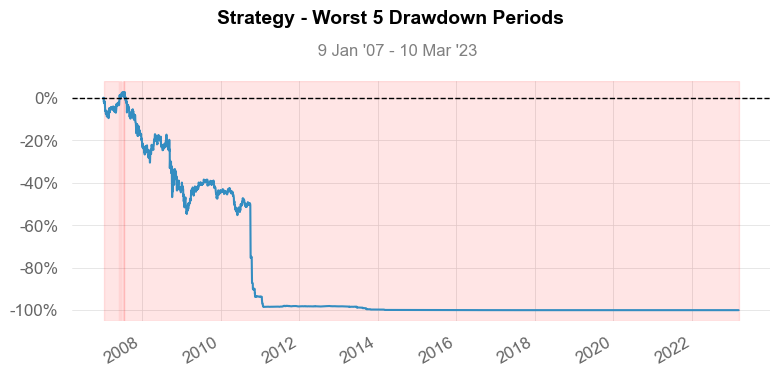

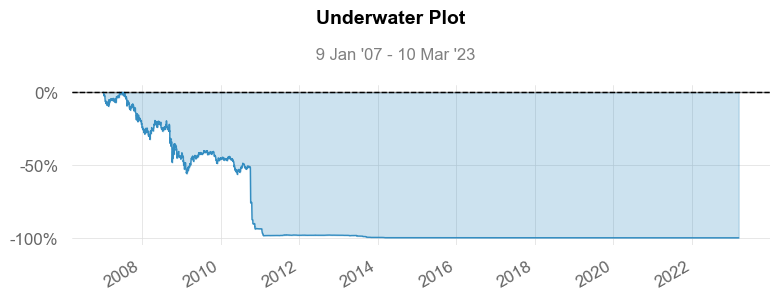

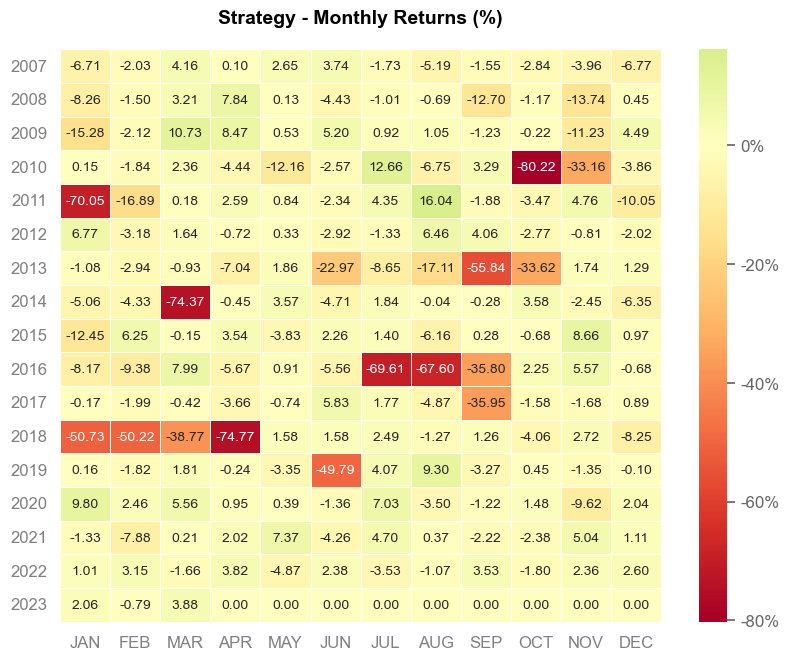

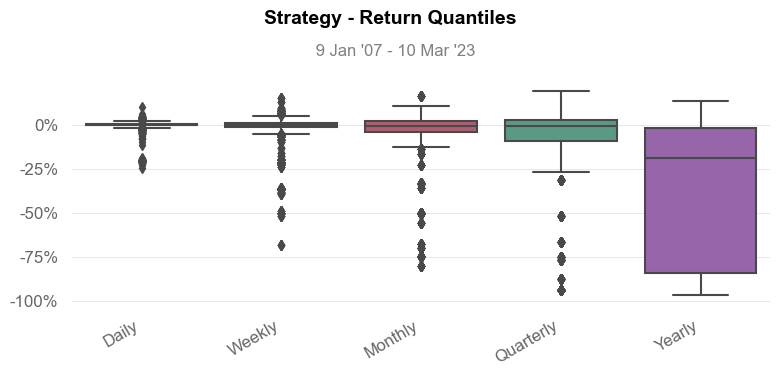

In [36]:
qs.reports.full(result['strategy'].resample('D').last().dropna())

## TF H4

In [37]:
TF = 'H4'

In [38]:
data_1 = XAUUSD[TF]

In [39]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

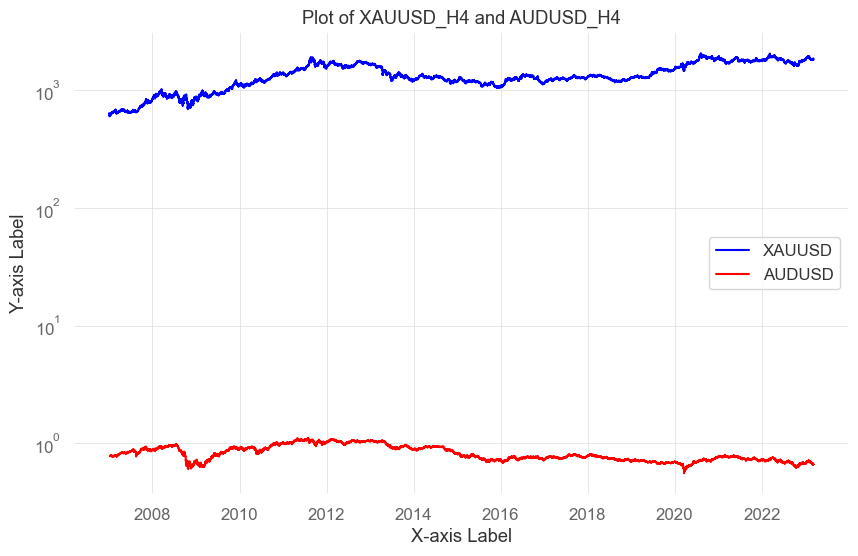

In [40]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [41]:
KF = Kalman_Filter(data_1, data_2)

In [42]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          3.072e+05
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:33:59   Log-Likelihood:                     -1.9088e+05
No. Observations:               25875   AIC:                                  3.818e+05
Df Residuals:                   25874   BIC:                                  3.818e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1603.0711      2.892    554.282      0.000    1597.402    1608.740
==============================================================================
Omnibus:                      972.436   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.510
Skew:                           0.332   Prob(JB):                    1.45e-164
Kurtosis:                       2.491   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
result = KF.Run()

In [44]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.0
Multiple (Buy-and-Hold):     3.879841
--------------------------------------
Out-/Underperformance:       -3.879841


CAGR:                        -0.735198
Annualized Mean:             -1.328773
Annualized Std:              0.546009
Sharpe Ratio:                -2.433612
Sortino Ratio:               -2.498526
Maximum Drawdown:            1.0
Calmar Ratio:                -0.735198
Max Drawdown Duration:       5726 Days
Kelly Criterion:             -4.748958


### Save Result Backtest 

In [45]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [46]:
filename = f'{Currency_Pair}_{TF}.csv'

In [47]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-09
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -96.12%
CAGR﹪                     -12.95%

Sharpe                     -0.85
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.8
Sortino                    -0.87
Smart Sortino              -0.82
Sortino/√2                 -0.62
Smart Sortino/√2           -0.58
Omega                      0.63

Max Drawdown               -97.34%
Longest DD Days            5860
Volatility (ann.)          17.05%
Calmar                     -0.13
Skew                       -16.74
Kurtosis                   310.66

Expected Daily %           -0.06%
Expected Monthly %         -1.65%
Expected Yearly %          -17.4%
Kelly Criterion            -28.96%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.82%
Expected Shortfall (cVaR)  -1.82%

Max Consec

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-02-23,2019-06-14,2023-03-10,5860,-97.344491,-97.306092
2,2007-01-17,2007-01-22,2007-01-23,7,-0.300042,-0.186183
3,2007-02-02,2007-02-05,2007-02-11,10,-0.261468,-0.247676
4,2007-02-19,2007-02-19,2007-02-21,3,-0.128238,-0.109886
5,2007-01-26,2007-01-28,2007-01-28,3,-0.121697,-0.039804


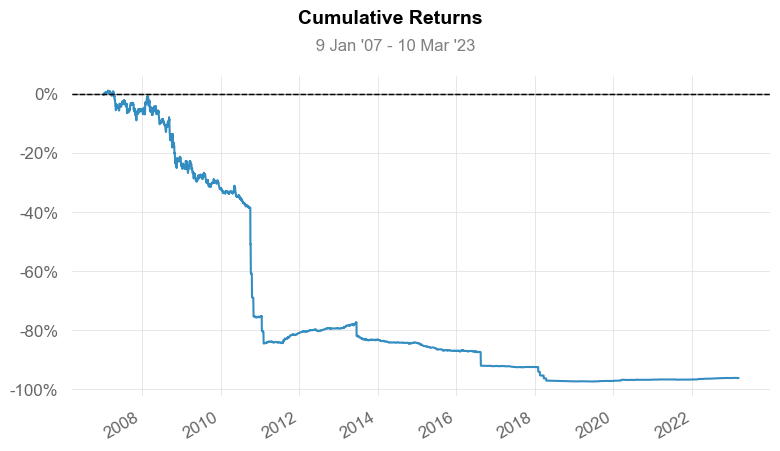

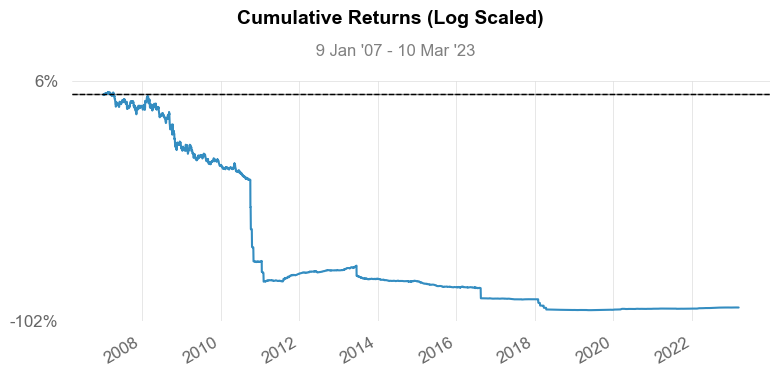

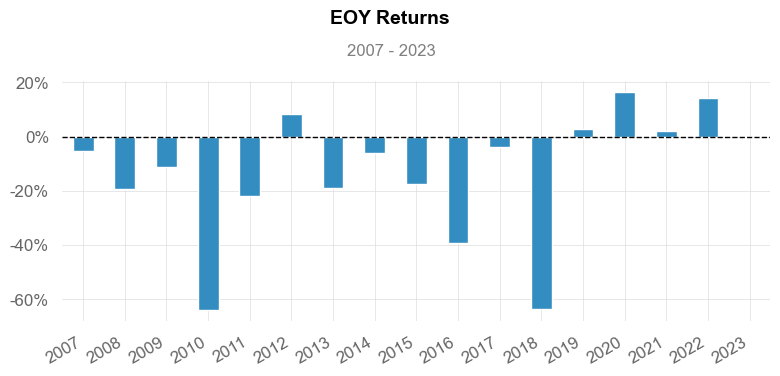

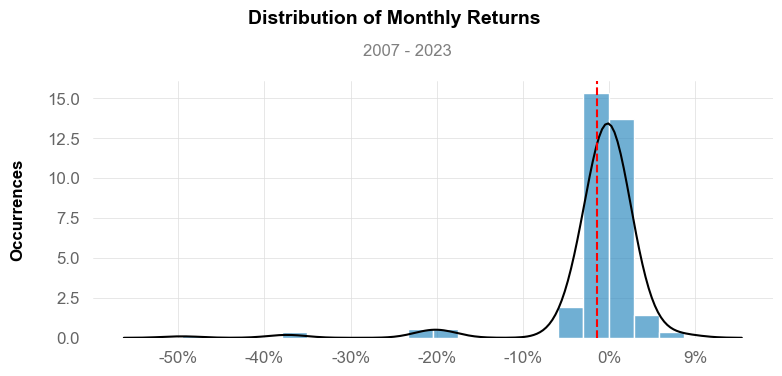

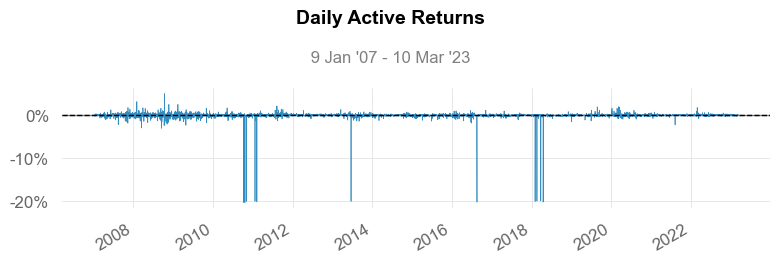

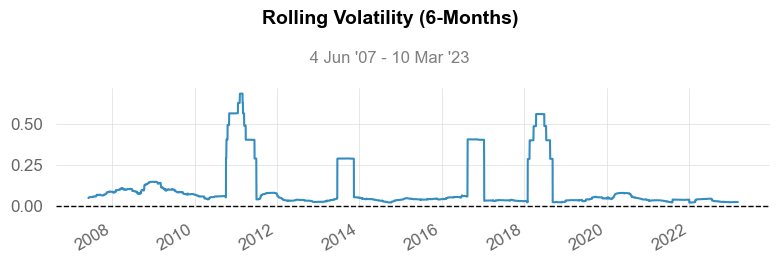

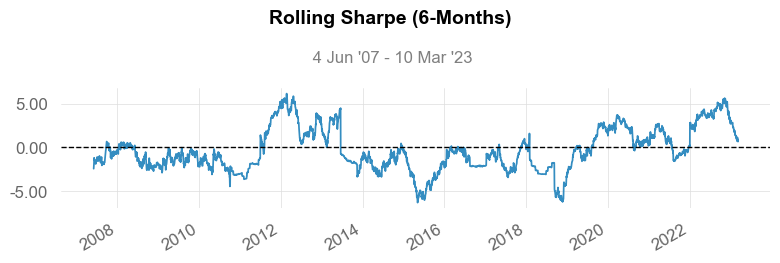

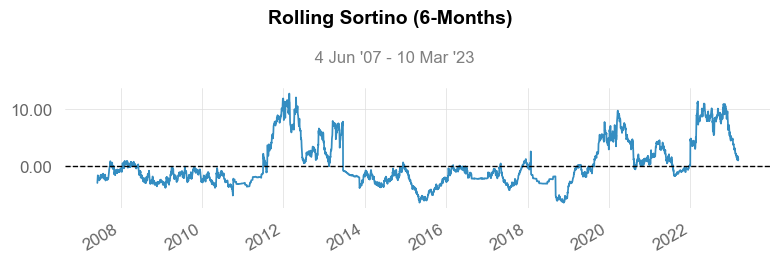

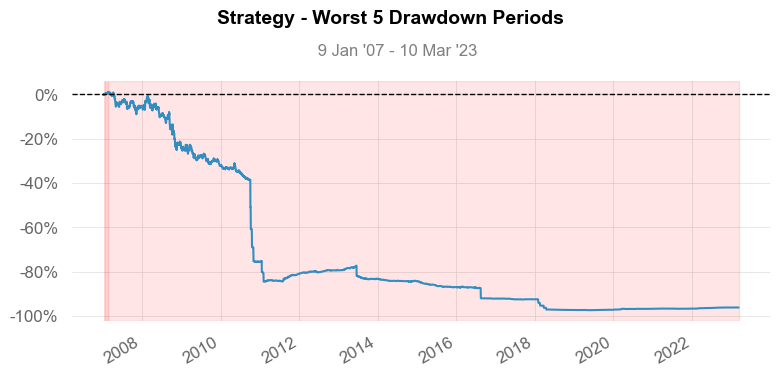

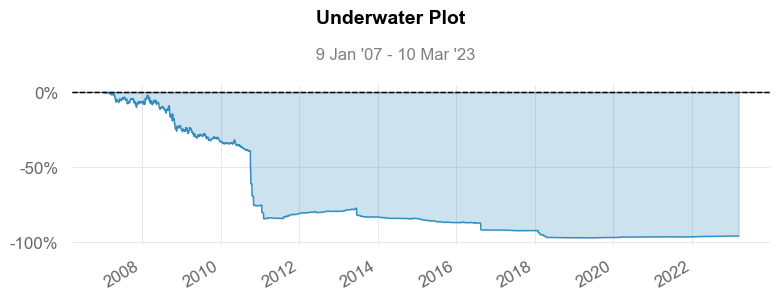

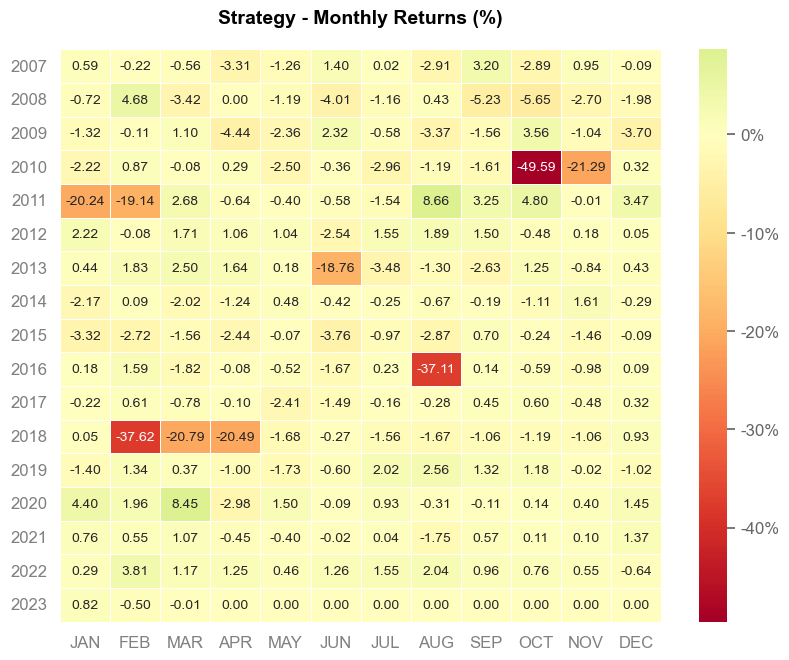

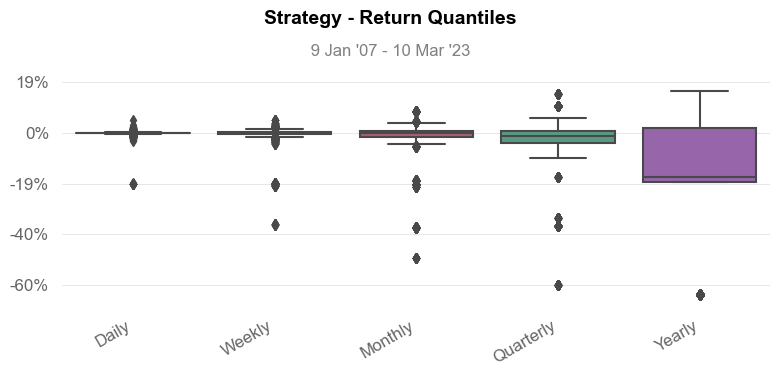

In [48]:
qs.reports.full(result['strategy'].resample('D').last().dropna())

## TF H1

In [49]:
TF = 'H1'

In [50]:
data_1 = XAUUSD[TF]

In [51]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

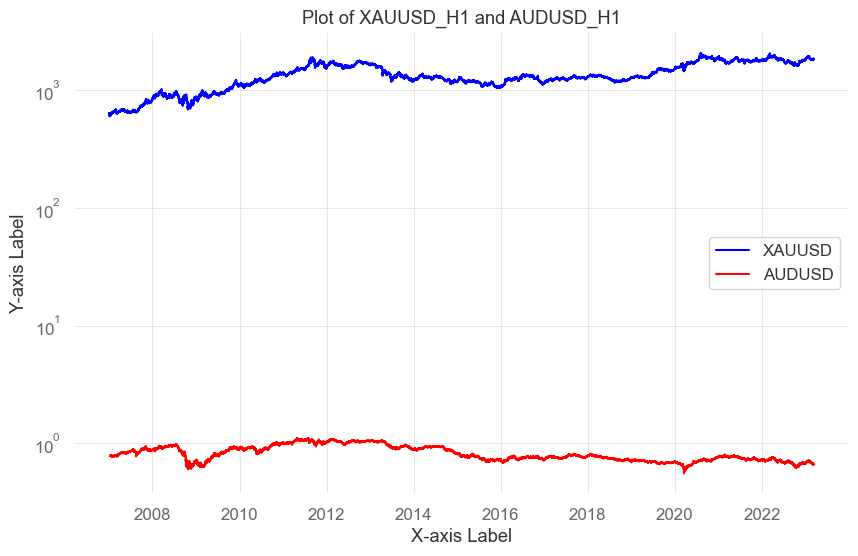

In [52]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [53]:
KF = Kalman_Filter(data_1, data_2)

In [54]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          1.188e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:35:18   Log-Likelihood:                     -7.3809e+05
No. Observations:              100053   AIC:                                  1.476e+06
Df Residuals:                  100052   BIC:                                  1.476e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1603.1824      1.471   1089.808      0.000    1600.299    1606.066
==============================================================================
Omnibus:                     3771.902   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2917.794
Skew:                           0.331   Prob(JB):                         0.00
Kurtosis:                       2.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
result = KF.Run()

### Save Result Backtest 

In [56]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [57]:
filename = f'{Currency_Pair}_{TF}.csv'

In [58]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-09
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -80.63%
CAGR﹪                     -6.77%

Sharpe                     -0.59
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.52
Sortino                    -0.6
Smart Sortino              -0.53
Sortino/√2                 -0.43
Smart Sortino/√2           -0.37
Omega                      0.69

Max Drawdown               -85.35%
Longest DD Days            5294
Volatility (ann.)          12.31%
Calmar                     -0.08
Skew                       -23.94
Kurtosis                   616.7

Expected Daily %           -0.03%
Expected Monthly %         -0.84%
Expected Yearly %          -9.21%
Kelly Criterion            -21.81%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.3%
Expected Shortfall (cVaR)  -1.3%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-09-11,2018-12-24,2023-03-10,5294,-85.348689,-85.292638
2,2007-01-10,2008-01-16,2008-08-13,582,-4.975742,-4.165646
3,2008-08-15,2008-09-04,2008-09-07,24,-1.391698,-1.385631


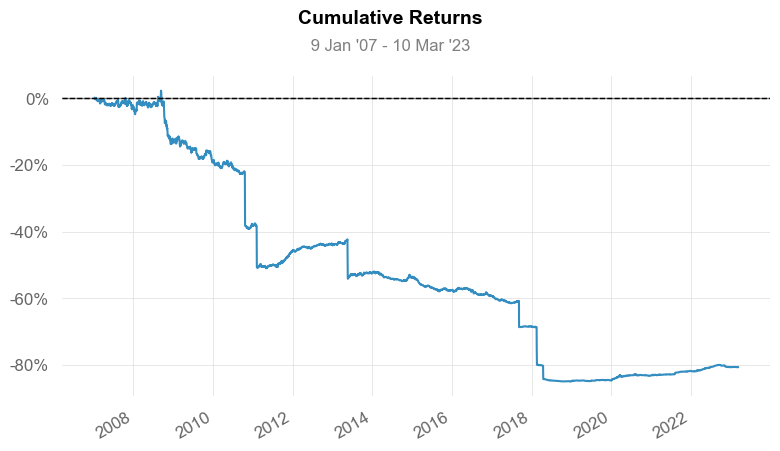

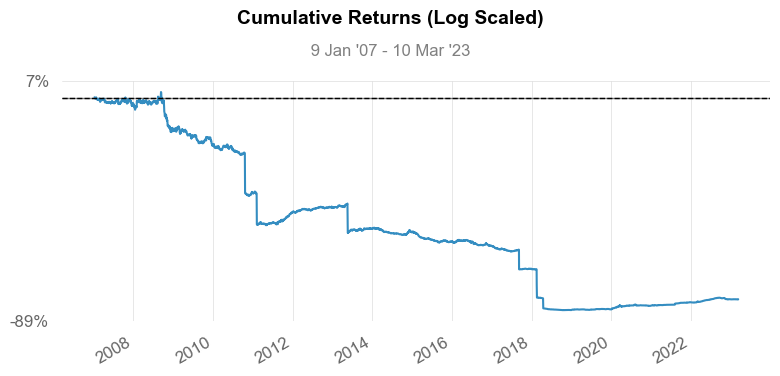

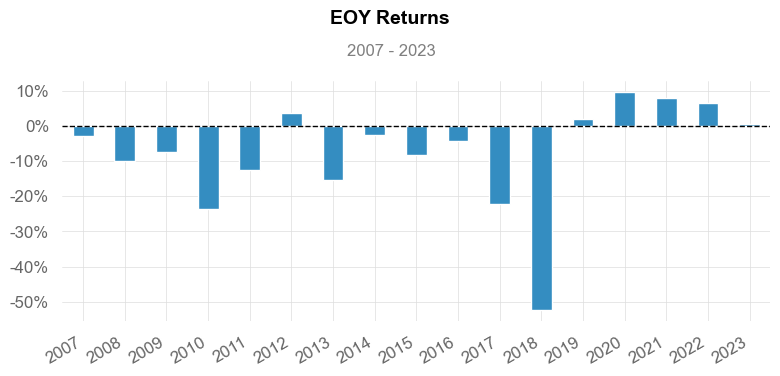

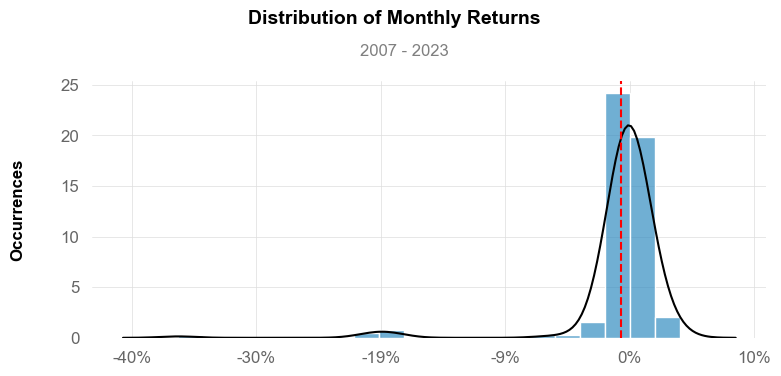

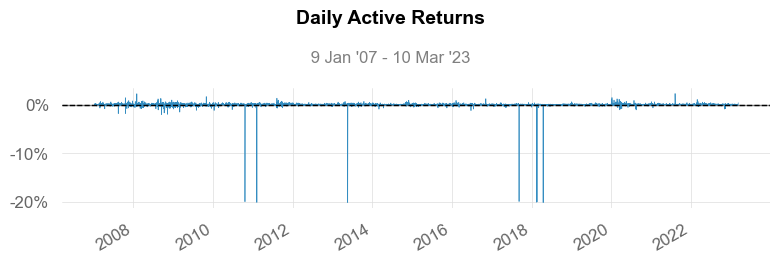

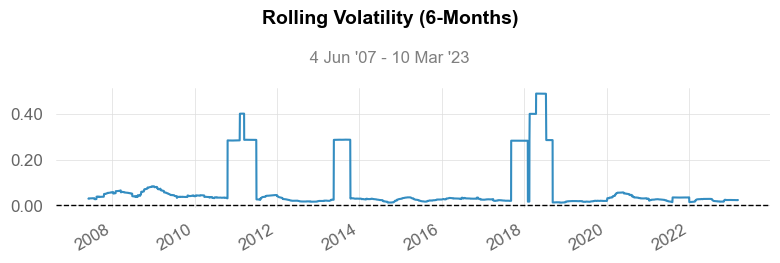

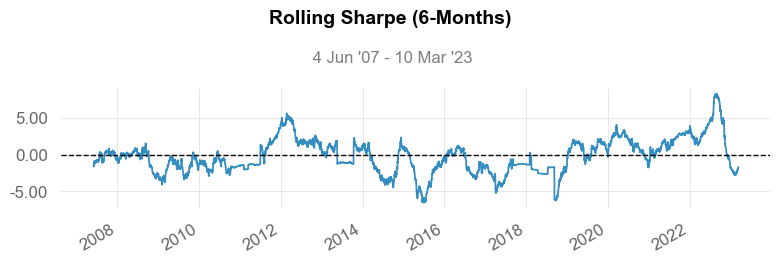

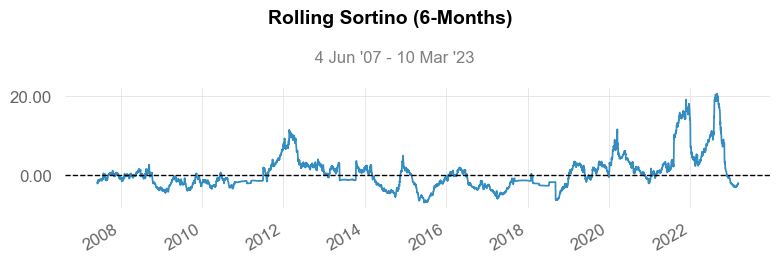

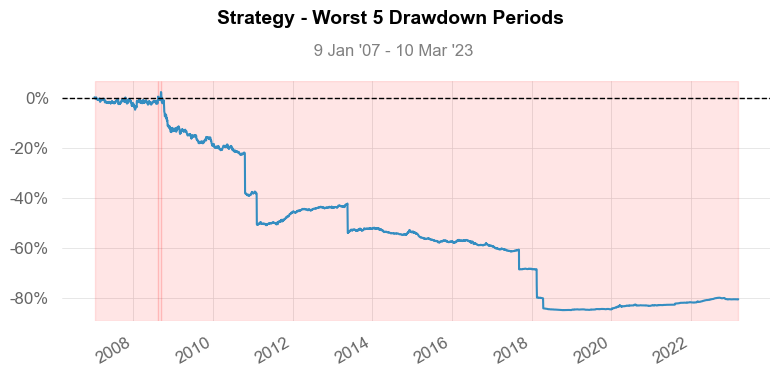

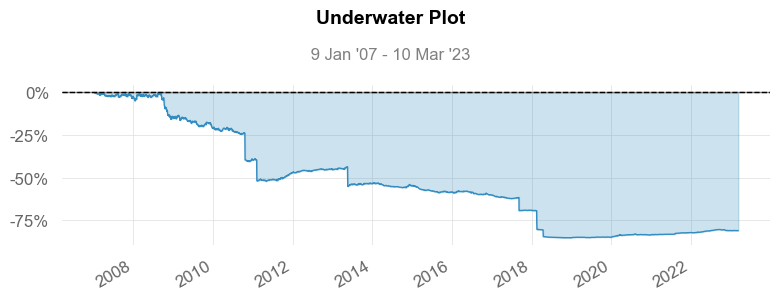

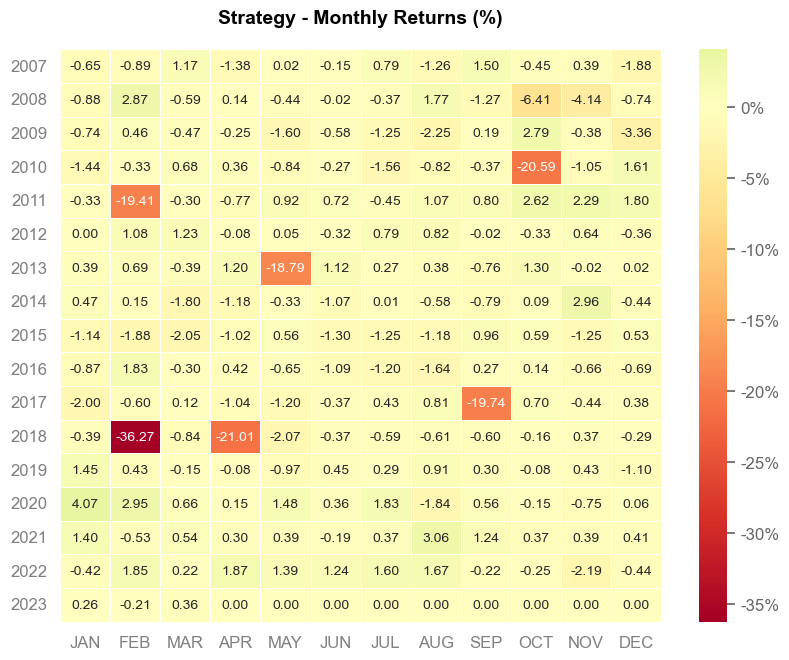

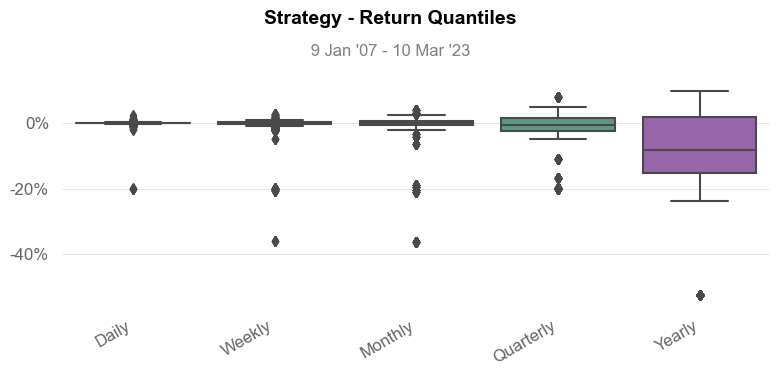

In [59]:
qs.reports.full(result['strategy'].resample('D').last().dropna())

## TF H30

In [60]:
TF = 'M30'

In [61]:
data_1 = XAUUSD[TF]

In [62]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

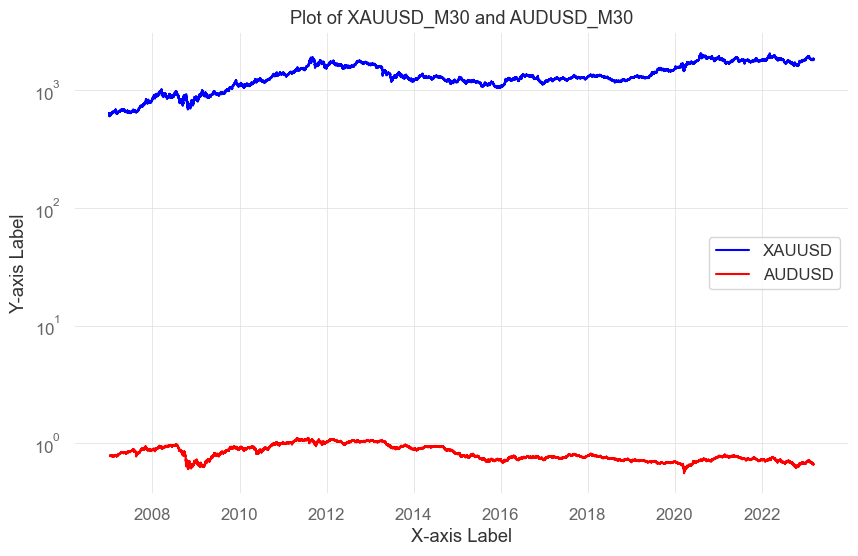

In [63]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [64]:
KF = Kalman_Filter(data_1, data_2)

In [65]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.375e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:48:18   Log-Likelihood:                     -1.4754e+06
No. Observations:              200000   AIC:                                  2.951e+06
Df Residuals:                  199999   BIC:                                  2.951e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1603.3836      1.040   1541.058      0.000    1601.344    1605.423
==============================================================================
Omnibus:                     7534.816   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5825.262
Skew:                           0.331   Prob(JB):                         0.00
Kurtosis:                       2.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
result = KF.Run()

### Save Result Backtest 

In [67]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [68]:
filename = f'{Currency_Pair}_{TF}.csv'

In [69]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-09
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -71.82%
CAGR﹪                     -5.26%

Sharpe                     -0.5
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.5
Sortino                    -0.51
Smart Sortino              -0.51
Sortino/√2                 -0.36
Smart Sortino/√2           -0.36
Omega                      0.68

Max Drawdown               -76.37%
Longest DD Days            5291
Volatility (ann.)          11.16%
Calmar                     -0.07
Skew                       -27.35
Kurtosis                   775.62

Expected Daily %           -0.03%
Expected Monthly %         -0.65%
Expected Yearly %          -7.18%
Kelly Criterion            -24.35%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.18%
Expected Shortfall (cVaR)  -1.18%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-09-14,2018-12-23,2023-03-10,5291,-76.374264,-76.295932
2,2007-01-10,2007-05-01,2007-10-18,282,-2.525258,-2.432166
3,2007-12-30,2008-03-16,2008-09-09,255,-2.437740,-2.287970
4,2007-11-21,2007-12-04,2007-12-24,34,-1.039654,-0.968271
5,2007-10-31,2007-11-02,2007-11-14,15,-0.924072,-0.741621


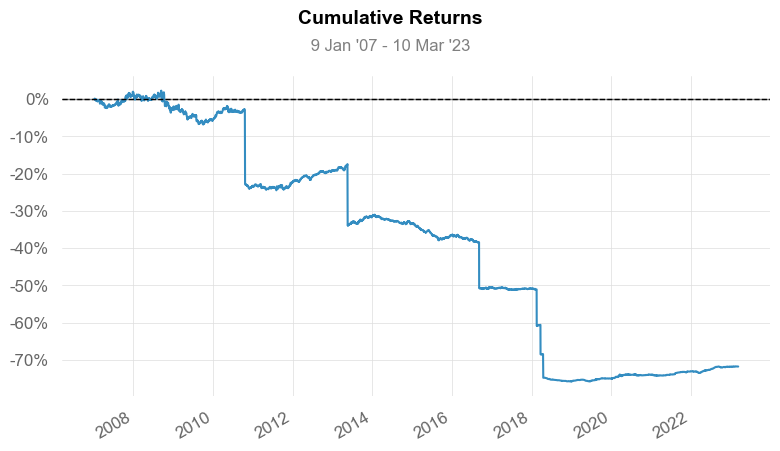

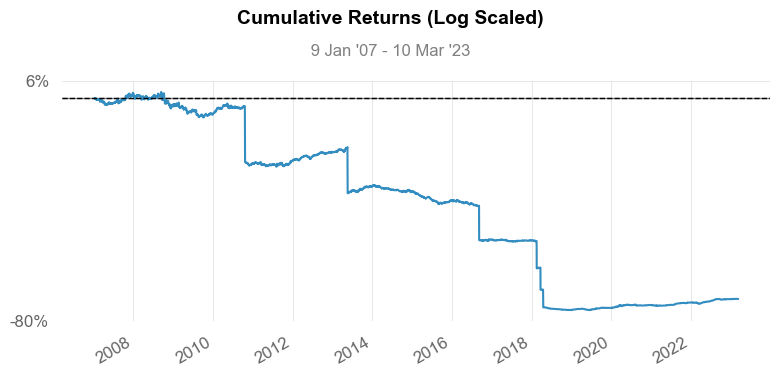

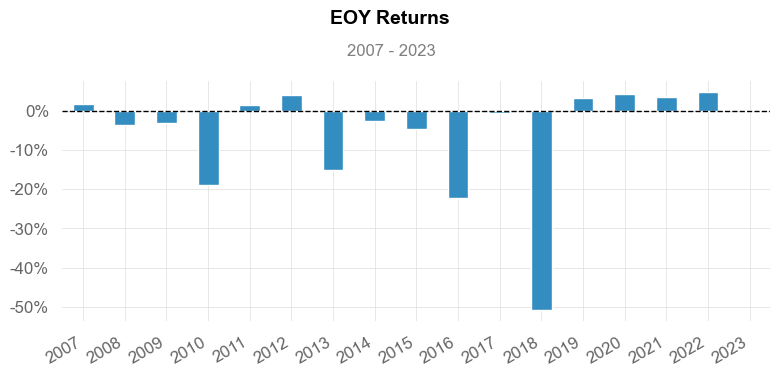

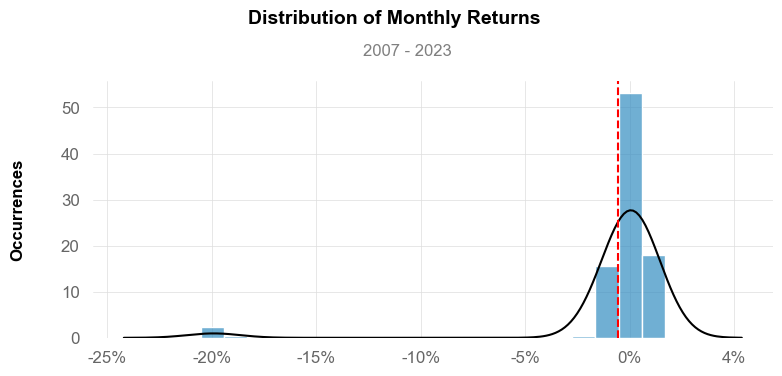

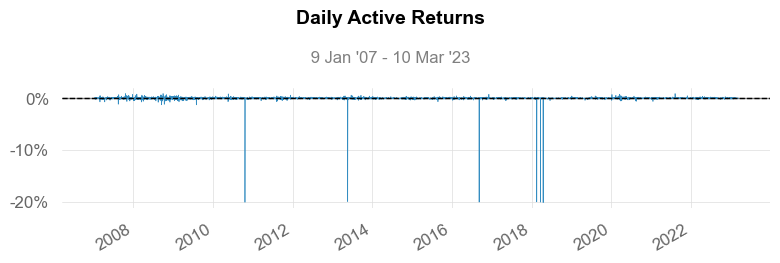

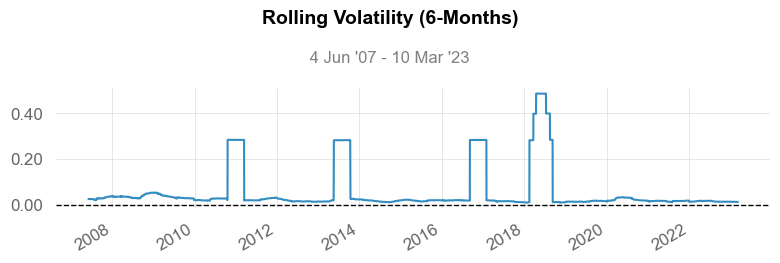

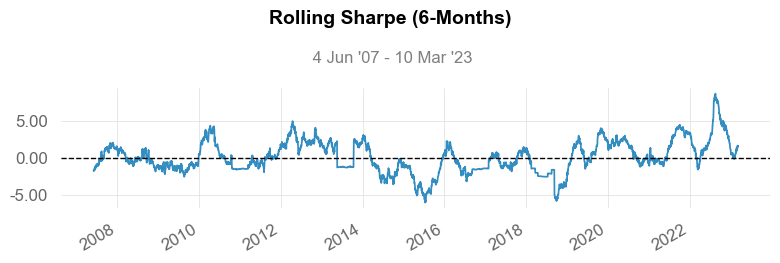

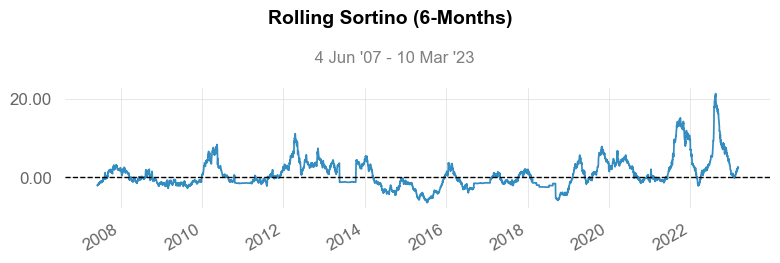

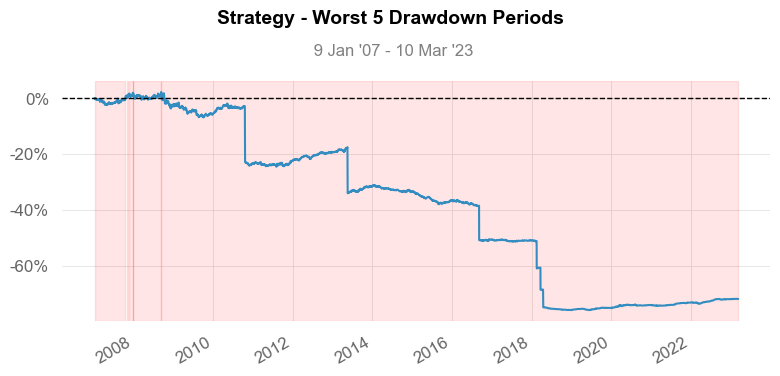

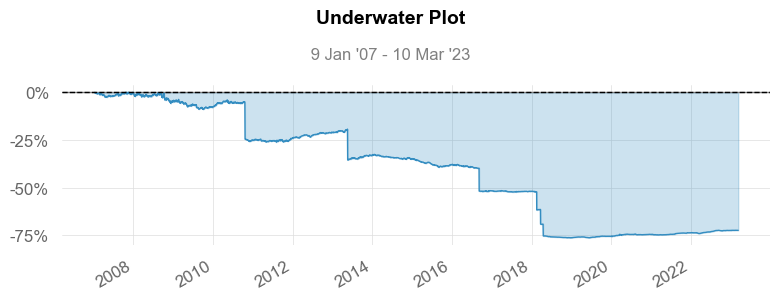

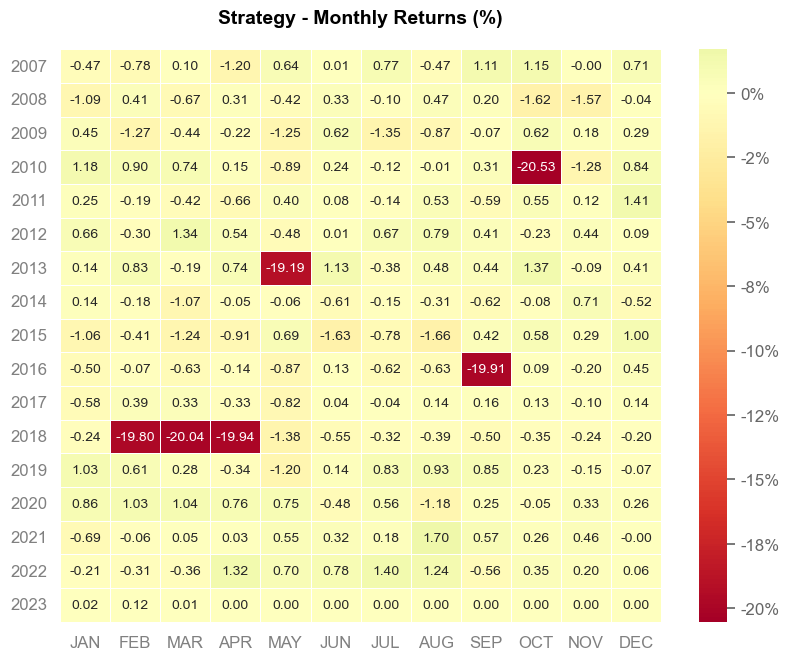

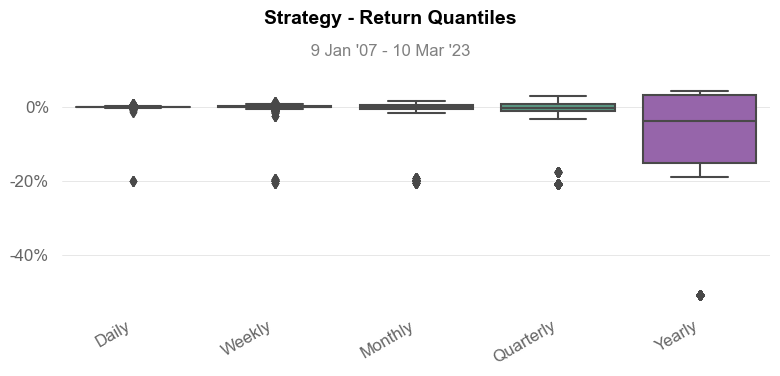

In [70]:
qs.reports.full(result['strategy'].resample('D').last().dropna())